<a href="https://colab.research.google.com/github/cezargfilho/amazon-activefire-cnn/blob/main/RCN_AMAZON_LANDSAT8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importações de Bibliotecas

No pré-processamento do dataset foram utilizadas as seguintes bibliotecas:


*   [Rasterio](https://github.com/rasterio/rasterio)
*   [Gdown](https://github.com/wkentaro/gdown)

In [1]:
# Instalações de bibliotecas
!pip install rasterio
!pip install gdown
!pip install --upgrade gdown
!pip install opencv-python matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 71.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Baixar o dataset do Google Drive

In [ ]:
# Se faz necessário colocar o ID pertencente ao arquivo público no Google Drive:
!gdown 1oO4BK-FnLlubSKFe9ejtUrSNZBz72L4w

# Brazil-amazon-fire.zip:
# Link = https://drive.google.com/file/d/1oO4BK-FnLlubSKFe9ejtUrSNZBz72L4w/view?usp=sharing
# archiveId = 1oO4BK-FnLlubSKFe9ejtUrSNZBz72L4w

# Brazil-amazon-nonfire.zip:
# Link = https://drive.google.com/file/d/1mROdPOPw-GMz5KsAwfKbn5mdkJ92neQ4/view?usp=sharing
# archiveId = 1mROdPOPw-GMz5KsAwfKbn5mdkJ92neQ4

In [ ]:
!unzip Brazil-amazon-fire.zip
!rm -f Brazil-amazon-fire.zip
!unzip '*.zip'
!rm -f *.zip

In [ ]:
import shutil
import os
    
source_dir = '/content/'
target_dir = './unziped/'
    
file_names = [file for file in os.listdir(source_dir) if file.endswith('.tif')]

if not os.path.exists(target_dir):
      os.makedirs(target_dir)
    
for file_name in file_names:
    shutil.move(os.path.join(source_dir, file_name), target_dir)

print('total:', len(os.listdir(target_dir)))

total: 85681


# Pré Processamento do dataset

## Função de transformação

Esta função tem como objetivo a transformação de uma imagem '.tif' para uma imagem '.png' com apenas 3 canais (RGB).

### Parâmetros

- `IMAGE`: O caminho do arquivo de imagem no formato `'.tif'`.
- `OUTPUT_IMAGE_NAME`: O nome do arquivo de saída, que será uma imagem no formato `'.png'`.

### Bibliotecas

- `rasterio`
- `numpy`
- `os`
- `cv2`

### Passos principais

1. Define a variável `OUTPUT_DIR` com o caminho do diretório onde a imagem de saída será armazenada.
2. Define a variável `MAX_PIXEL_VALUE` com o valor máximo de um pixel na imagem, que será utilizado para normalizar a imagem. O valor `MAX_PIXEL_VALUE = 65535` é usado para normalizar a imagem porque este é o valor máximo que um pixel pode ter em uma imagem de satélite do tipo Landsat 8.
3. Substitui a extensão do arquivo de saída de `'.tif'` para `'.png'`.
4. Define a função interna `get_img_762bands`, que recebe como parâmetro o caminho da imagem `'.tif'` e retorna a imagem nas bandas 7, 6 e 2 no formato `(altura, largura, canais)` e normalizada.
5. Verifica se o diretório de saída existe, caso contrário, cria o diretório.
6. Chama a função `get_img_762bands` para obter a imagem normalizada.
7. Multiplica a imagem normalizada por 255 e converte para `uint8`.
8. Salva a imagem no formato `'.png'` no diretório de saída, convertendo-a de `RGB` para `BGR`.


In [ ]:
import rasterio
import numpy as np
import os
import cv2

def transform_image(IMAGE, OUTPUT_IMAGE_NAME):
  OUTPUT_DIR = '/content/dataset_output'
  MAX_PIXEL_VALUE = 65535 # Max. pixel value, used to normalize the image
  OUTPUT_IMAGE_NAME = OUTPUT_IMAGE_NAME.replace('.tif', '.png')
  def get_img_762bands(path):
      img = rasterio.open(path).read((7,6,2)).transpose((1, 2, 0))      
      img = np.float32(img)/MAX_PIXEL_VALUE #Normalização da imagem faz o pixel da imagem ficar entre 0 e 1 
      
      return img
          

  if not os.path.exists(OUTPUT_DIR):
      os.makedirs(OUTPUT_DIR)

  img = get_img_762bands(IMAGE)
  #plt.imshow(img)

  img = np.array(img * 255, dtype=np.uint8)
  cv2.imwrite(os.path.join(OUTPUT_DIR, OUTPUT_IMAGE_NAME), cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

## Função para percorrer um diretório com imagens

Percorre o diretório do dataset chamando a função de transformação para cada imagem.

### Parâmetros

- `path`: O caminho do diretório que contém as imagens no formato `'.tif'`.

### Passos principais

1. Cria uma lista `paths` que contém o caminho completo de todas as imagens no diretório especificado em `path`.
2. Cria uma lista `file_names` com o nome de todas as imagens no diretório especificado em `path`.
3. Obtém o tamanho da lista `paths`.
4. Itera sobre cada imagem em `paths` e chama a função `transform_image` com os parâmetros `IMAGE` definido como o caminho da imagem em `paths[i]` e `OUTPUT_IMAGE_NAME` definido como o nome da imagem em `file_names[i]` substituindo a extensão `'.tif'` para `'.png'`.

### Observação

Certifique-se de que o caminho especificado em `path` contém apenas imagens no formato `'.tif'`. Caso contrário, pode ocorrer um erro ao chamar a função `transform_image`.


In [ ]:
path = '/content/unziped/'
paths = [os.path.join(path, nome) for nome in os.listdir(path)]
file_names = os.listdir(path)
size = len(paths)
print(size)

for i in range(0, size):
  transform_image(IMAGE = paths[i], OUTPUT_IMAGE_NAME = file_names[i])

85681


In [ ]:
# Remove imagens .TIF
!rm -fr ./unziped

## Aumento de Dados (Data Augmentation)

O aumento de dados (data augmentation) é uma técnica utilizada para aumentar a quantidade de dados em um conjunto de dados de treinamento. Esta técnica é muito útil em tarefas de aprendizado de máquina quando há poucos dados disponíveis e o modelo precisa ser treinado com mais exemplos para evitar o sobreajuste (overfitting). 

Neste bloco de código, utilizamos a biblioteca `Augmentor` para realizar o aumento de dados nas imagens de treinamento. As transformações realizadas foram:

- `rotate`: Rotaciona a imagem em um ângulo aleatório entre `-10` e `10` graus.
- `flip_top_bottom`: Virar verticalmente a imagem com probabilidade de `0.5`.
- `flip_left_right`: Virar horizontalmente a imagem com probabilidade de `0.5`.

### Biblioteca

- `Augmentor`

### Passos principais

1. Cria um objeto `p` do tipo `Augmentor.Pipeline` com o caminho do diretório que contém as imagens de treinamento.
2. Adiciona a transformação `rotate` com um ângulo máximo de rotação de `10` graus para esquerda e `10` graus para a direita.
3. Adiciona a transformação `flip_top_bottom` para virar verticalmente a imagem com probabilidade de `0.5`.
4. Adiciona a transformação `flip_left_right` para virar horizontalmente a imagem com probabilidade de `0.5`.
5. Gera `18219` novas imagens utilizando a função `sample` do objeto `p`.
6. Aplica as transformações geradas às imagens de treinamento com a função `process` do objeto `p`.

### Observação

A transformação `zoom` foi comentada pela perda de pixels, mas pode ser utilizada descomentando a linha `p.zoom(probability=0.5, min_factor=1.1, max_factor=1.5)` e ajustando os parâmetros conforme necessário caso encontre uma possibilidade. Além disso, outras transformações podem ser adicionadas para aumentar ainda mais a diversidade dos dados de treinamento.


In [ ]:
!pip  install  Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import Augmentor
import os

UPPER_CLASS_DIR = './dataset_brazil_amazon_v2/train/0/'
INPUT_DIR ='./dataset_brazil_amazon_v2/train/1/'
OUTPUT_DIR = '/content/dataset_brazil_amazon_landsat_8/train'
QTD_AUGMENTED = len(os.listdir(UPPER_CLASS_DIR)) - len(os.listdir(INPUT_DIR)) 

In [ ]:
QTD_AUGMENTED

In [ ]:
p = Augmentor.Pipeline(INPUT_DIR)
p.rotate_random_90(probability = 1)
p.flip_random(probability = 1)

p.sample(QTD_AUGMENTED)

## Separação de Dados de Treinamento e Teste

Este bloco de código tem como objetivo separar as imagens em dois conjuntos de dados distintos: um conjunto para treinamento e outro conjunto para teste. A proporção escolhida para esta separação foi de 80% para treinamento e 20% para teste.

### Parâmetros

- `OUT_DIR`: O caminho do diretório que contém as imagens que serão separadas.
- `train_qtd`: A quantidade de imagens que será utilizada para o conjunto de dados de teste.

### Passos principais

1. Cria uma lista `DIR_LIST` que contém todos os arquivos no diretório especificado em `OUT_DIR`.
2. Calcula a quantidade de imagens que serão utilizadas para o conjunto de dados de treinamento e teste, respectivamente.
3. Cria uma lista `files_list` que contém o caminho completo de todas as imagens no diretório especificado em `OUT_DIR`.
4. Itera sobre cada arquivo em `files_list` e adiciona à lista `filesToCopy` se o arquivo termina com a extensão `'.png'`.
5. Seleciona aleatoriamente `train_qtd` imagens da lista `filesToCopy` para serem movidas para o diretório de teste.
6. Move cada imagem selecionada na etapa anterior para o diretório de teste especificado em `destPath`.

### Observação

Certifique-se de que o caminho especificado em `OUT_DIR` contém apenas imagens no formato `'.png'`. Caso contrário, pode ocorrer um erro ao selecionar as imagens para o conjunto de dados de teste. Além disso, é importante que o diretório de teste (`destPath`) já exista antes de executar este bloco de código.


In [ ]:
# Cria estrutura padrão
!mkdir -p dataset_amazon/train/0
!mkdir -p dataset_amazon/train/1
!mkdir -p dataset_amazon/test/0
!mkdir -p dataset_amazon/test/1

In [ ]:
import os
import random
import shutil

# Calcula a 80% treino / 20% teste
OUT_DIR = '/content/dataset_output'
DIR_LIST = os.listdir(OUT_DIR)

train_qtd = int(len(DIR_LIST)*.2)


files_list = []

for root, dirs, files in os.walk(OUT_DIR):
    for file in files:
        #all 
        if file.endswith(".png"):
            files_list.append(os.path.join(root, file))

#print images
#lets me count and print the amount of jpeg,jpg,pmg 
file_count = len(files_list)
print('total files: ', file_count)

# print files_list   
filesToCopy = random.sample(files_list, train_qtd)  #prints two random files from list 

destPath = 'dataset_amazon/test/1'

# iteraate over all random files and move them
for file in filesToCopy:
    shutil.move(file, destPath)

total files:  68541


In [ ]:
# move train files to destiny folder
destination = 'dataset_amazon/train/1'

# iterate on all files to move them to destination folder
for file in DIR_LIST:
  src_path = os.path.join(OUT_DIR, file)
  dst_path = os.path.join(destination, file)
  shutil.move(src_path, dst_path)

In [ ]:
print('total test 1:', len(os.listdir('/content/dataset_amazon/test/1')))
print('total train 1:', len(os.listdir('/content/dataset_amazon/train/1')))
print('total output:', len(os.listdir('/content/dataset_output')))
print('total test 0:', len(os.listdir('/content/dataset_amazon/test/0')))
print('total train 0:', len(os.listdir('/content/dataset_amazon/train/0')))

total test 1: 0
total train 1: 0
total output: 85681
total test 0: 0
total train 0: 0


# Realiza Upload de imagens transformadas para o Google Drive

In [ ]:
from google.colab import drive

In [ ]:
!zip -r 'dataset_venezuela.zip' '/content/dataset_venezuela'

In [ ]:
!mv '/content/dataset_venezuela.zip' /content/drive/MyDrive/DATASET_AMAZON/

In [ ]:
drive.flush_and_unmount()

# Dataset

Dataset original: [A Large-Scale Dataset for Active Fire Detection/Segmentation (Landsat-8)](https://ieee-dataport.org/open-access/large-scale-dataset-active-fire-detectionsegmentation-landsat-8)

O dataset utilizado neste projeto sofreu os pré-processamentos a seguir:

*   Captura de três dos onze canais (RGB);
*   Balanceamento da classe incêndio utilizando Data Augmentation;



Baixar o modificado: https://drive.google.com/file/d/zYgZkCN_UhhxJmR7N8Kr7qJBVS/view?usp=sharing

# Dowload e carga do dataset

In [ ]:
# Download do dataset pré-processado
## Balanceado e imagens em RGB
!gdown 1ARhnvhfmzmfbhcuesSWFaWioM0H_wy87
!unzip dataset_brazil_amazon_landsat_8.zip
!rm -f dataset_brazil_amazon_landsat_8.zip

In [3]:
import tensorflow as tf
import numpy as np
import os
import shutil
from matplotlib import pyplot as plt

In [4]:
#First find where the ".ipynb_checkpoints" is located.

train_dir = os.listdir("/content/dataset_brazil_amazon_landsat_8/train") 
test_dir = os.listdir("/content/dataset_brazil_amazon_landsat_8/test")
print(train_dir, test_dir)

['.ipynb_checkpoints', '0', '1'] ['.ipynb_checkpoints', '0', '1']


In [5]:
# Remove directories /.ipynb_checkpoints

shutil.rmtree("/content/dataset_brazil_amazon_landsat_8/train/.ipynb_checkpoints")
shutil.rmtree("/content/dataset_brazil_amazon_landsat_8/test/.ipynb_checkpoints")

# Definição dos Hiperparâmetros

Este bloco de código tem como objetivo definir os hiperparâmetros que serão utilizados no modelo de aprendizado de máquina.

### Parâmetros

- `TRAIN_FOLDER`: O caminho do diretório que contém as imagens de treinamento.
- `TEST_FOLDER`: O caminho do diretório que contém as imagens de teste.
- `SPLIT_RATE`: A proporção utilizada para separar as imagens de treinamento e teste. O valor padrão é `0.8`.
- `IMAGE_HEIGHT`: A altura das imagens que serão utilizadas no modelo.
- `IMAGE_WIDTH`: A largura das imagens que serão utilizadas no modelo.
- `NUM_CHANNELS`: O número de canais das imagens que serão utilizadas no modelo. O valor padrão é `3`.
- `BATCH_SIZE`: O tamanho do lote utilizado durante o treinamento. O valor padrão é `32`.
- `LEARNING_RATE`: A taxa de aprendizado utilizada durante o treinamento.
- `LOSSES`: A função de perda utilizada durante o treinamento.
- `OPTIMIZER`: O otimizador utilizado durante o treinamento.

### Observação

Os hiperparâmetros podem ser ajustados conforme necessário para otimizar o modelo de aprendizado de máquina. Além disso, é importante que os caminhos especificados em `TRAIN_FOLDER` e `TEST_FOLDER` correspondam aos diretórios que contêm as imagens de treinamento e teste, respectivamente.


In [6]:
#Hiperparametros
TRAIN_FOLDER = '/content/dataset_brazil_amazon_landsat_8/train'
TEST_FOLDER = '/content/dataset_brazil_amazon_landsat_8/test'

IMAGE_HEIGHT = 128  # height of the image
IMAGE_WIDTH = 128   # width of the image
NUM_CHANNELS = 3   # number of channels of the image
IMAGE_SIZE = [IMAGE_HEIGHT, IMAGE_WIDTH]
CLASS_NAMES = ['0','1']
BATCH_SIZE = 64
LEARNING_RATE = 0.0001
LOSSES = tf.losses.BinaryCrossentropy()
OPTIMIZER = tf.keras.optimizers.Adam(learning_rate= LEARNING_RATE)
EPOCHS = 100
SPLIT_RATE_TRAIN = 0.9
SPLIT_RATE_VALIDATION = 0.1

## Carregamento dos dados de treinamento e teste

Este bloco de código tem como objetivo carregar as imagens de treinamento em um objeto `tf.data.Dataset` utilizando o método `image_dataset_from_directory` da biblioteca TensorFlow.

### Parâmetros

- `TRAIN_FOLDER`: O caminho do diretório que contém as imagens de treinamento.
- `IMAGE_HEIGHT`: A altura das imagens que serão utilizadas no modelo.
- `IMAGE_WIDTH`: A largura das imagens que serão utilizadas no modelo.
- `BATCH_SIZE`: O tamanho do lote utilizado durante o treinamento.

### Keras

Neste trabaho, a biblioteca Keras será utilizada para construir uma Rede Neural Convolucional (CNN) que será treinada para classificar imagens como apresentando ou não foco de incêndio na Amazônia. O conjunto de dados contém imagens de satélite do projeto Landsat8. As imagens serão pré-processadas e divididas em conjuntos de treinamento e teste. Em seguida, um modelo CNN será definido utilizando camadas convolucionais, de pooling e densas. O modelo será compilado com uma função de perda, um otimizador e métricas de avaliação. O modelo será treinado com os dados de treinamento e validado com os dados de teste. Por fim, o modelo será avaliado utilizando as métricas de avaliação definidas e será salvo para uso posterior.


In [7]:
def count_directory_images(dir_path):
  count = 0
  for path in os.listdir(dir_path):
      if os.path.isfile(os.path.join(dir_path, path)):
          count += 1
  return count

def get_size_dataset(FOLDER):
  qtd_0 = count_directory_images(FOLDER + '/0')
  qtd_1 = count_directory_images(FOLDER + '/1')
  size = qtd_0 + qtd_1

  print('No Fire:  %s' % qtd_0)
  print('Fire:     %s' % qtd_1)
  print('Total:    %s' % size)
  return qtd_0, qtd_1, size

In [8]:
qtd_0, qtd_1, size = get_size_dataset(TRAIN_FOLDER)

No Fire:  86764
Fire:     86764
Total:    173528


In [9]:
qtd_0, qtd_1, size = get_size_dataset(TEST_FOLDER)

No Fire:  21691
Fire:     17137
Total:    38828


In [10]:
# CARREGANDO IMAGENS DE TREINO
train_data = tf.keras.utils.image_dataset_from_directory(
    directory = TRAIN_FOLDER, 
    image_size = IMAGE_SIZE, 
    batch_size = BATCH_SIZE,
    label_mode = 'binary',
    class_names = CLASS_NAMES,
    shuffle=True,
    seed=123
    )

Found 173528 files belonging to 2 classes.


In [11]:
# CARREGANDO IMAGENS DE TESTE (Por padrao eh utilizado batch_size = 32)
test_data = tf.keras.utils.image_dataset_from_directory(
    directory = TEST_FOLDER,
    image_size = IMAGE_SIZE,
    shuffle = True
    )

Found 38828 files belonging to 2 classes.


## Plotando Imagens

In [ ]:
def plot_dataset(dataset):

    plt.gcf().clear()
    plt.figure(figsize = (10, 10))

    for features, labels in dataset.take(1):

        for i in range(9):

            plt.subplot(3, 3, i + 1)
            plt.axis('off')

            plt.imshow(features[i].numpy().astype('uint8'))
            plt.title(labels[i].numpy().astype('uint8'))

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


<Figure size 640x480 with 0 Axes>

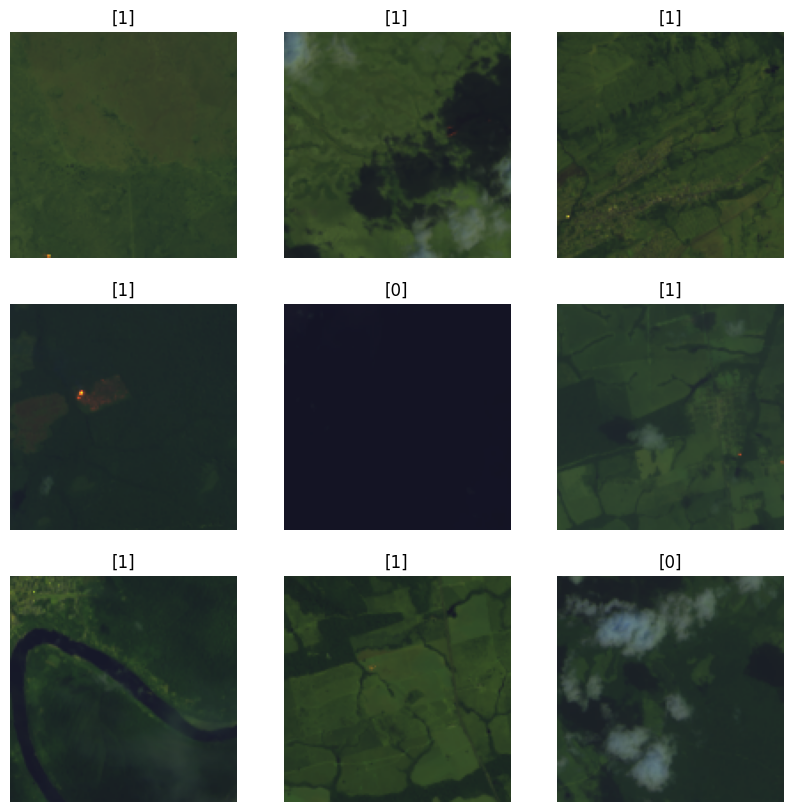

In [ ]:
plot_dataset(train_data)

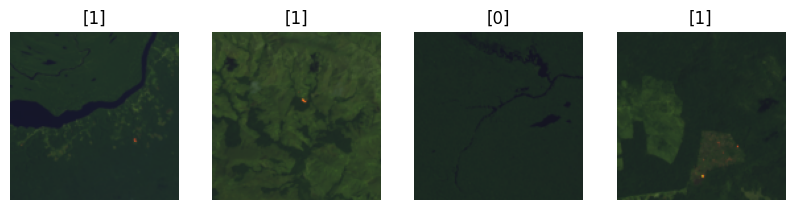

In [ ]:
# Plotando Imagens
data_iterator = train_data.as_numpy_iterator()
batch = data_iterator.next()

fig, ax = plt.subplots(ncols=4, figsize=(10,10))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx].astype(int))
    ax[idx].axis("off")

In [ ]:
# Verificar valor de px das imagens
print(train_data.as_numpy_iterator().next())

## Normalização de valores das Imagens

Estes blocos de código tem como objetivo redimensionar as imagens de treinamento e teste.

### Parâmetros

- `train_data`: O objeto `tf.data.Dataset` que contém as imagens de treinamento.
- `test_data`: O objeto `tf.data.Dataset` que contém as imagens de teste.

### Observação

A função `map` é utilizada para aplicar uma função lambda que normaliza as imagens dividindo-as por 255. Isso é necessário para que os valores dos pixels das imagens estejam no intervalo de 0 a 1.


In [12]:
train_data_normalized = train_data.map(lambda x,y: (x/255, y))

In [13]:
test_data_normalized = test_data.map(lambda x,y: (x/255, y))

In [ ]:
# Apresentando valor de pixel após normalização

train_data_iterator = train_data_normalized.as_numpy_iterator()
print(train_data_normalized.as_numpy_iterator().next())

## Separação dos Dados em Conjuntos de Treinamento, Validação e Teste

Este bloco de código tem como objetivo separar as imagens de treinamento em conjuntos de treinamento, validação e teste.

### Parâmetros

- `data_train`: O objeto `tf.data.Dataset` que contém as imagens de treinamento.
- `data_test`: O objeto `tf.data.Dataset` que contém as imagens de teste.

### Observação

A proporção utilizada para separar as imagens de treinamento em conjuntos de treinamento, validação e teste é definida pelos parâmetros `train_size`, `val_size` e `test_size`. Neste caso, 70% das imagens são usadas para treinamento, 20% para validação e 10% para teste. Certifique-se de ajustar esses valores conforme necessário para o seu conjunto de dados.


In [14]:
# Separando treino e validacao
train_size = int(len(train_data_normalized) * SPLIT_RATE_TRAIN)
val_size = int(len(train_data_normalized) * SPLIT_RATE_VALIDATION)

train = train_data_normalized.take(train_size)
val = train_data_normalized.skip(train_size).take(val_size)

print('Qtd batches train:', len(train))
print('Qtd batches validation:', len(val))

Qtd batches train: 2440
Qtd batches validation: 271


In [15]:
# Passando as imagens normalizadas para variável 'test'
test = test_data_normalized
print('Qtd batches test:', len(test))

Qtd batches test: 1214


## Definição do Modelo de Rede Neural Convolucional

Este bloco de código tem como objetivo definir o modelo da Rede Neural Convolucional (CNN) que será utilizada para classificar as imagens de satélite.

### Parâmetros

- `IMAGE_HEIGHT`: A altura das imagens.
- `IMAGE_WIDTH`: A largura das imagens.
- `NUM_CHANNELS`: O número de canais das imagens.

### Observação

O modelo definido aqui é uma CNN simples, composta por várias camadas convolucionais e de pooling, seguidas por uma camada densa. A camada de entrada espera uma imagem com a altura, largura e número de canais especificados. A camada de saída possui uma única unidade e uma função de ativação sigmóide, indicando se a imagem apresenta ou não um foco de incêndio. A função de perda utilizada será a "Sparse Categorical Crossentropy", que é uma função de perda comum para problemas de classificação. O otimizador utilizado será o Adam, que é um algoritmo popular de otimização para redes neurais. A métrica de avaliação utilizada será a acurácia.


In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [17]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3), padding='same', activation='relu', input_shape=(IMAGE_HEIGHT,IMAGE_WIDTH, NUM_CHANNELS)))
# Downsampling
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.30))
# Conv_1
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.30))
# Conv_2
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.30))
# Conv_3
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.30))

# Reshape transofrmando a saída em um array
model.add(Flatten())

# Camada totalmente conectada (full-conected)
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

## Compilação da Rede Neural Convolucional

Este bloco de código tem como objetivo compilar a Rede Neural Convolucional (CNN) definida anteriormente com a função de perda, otimizador e métricas de avaliação especificados.

### Observação

A função de perda e otimizador são as mesmas definidas anteriormente. Além disso, quatro métricas de avaliação foram definidas para monitorar o desempenho da rede durante o treinamento: acurácia binária, AUC (Area Under the Curve), precisão e recall. Essas métricas são comuns em problemas de classificação binária e podem ser usadas para avaliar o desempenho da rede durante o treinamento e a validação.


In [18]:
metrics_list = [
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        #tf.keras.metrics.AUC(name='auc'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]

In [19]:
model.compile(
    loss=LOSSES,
    optimizer=OPTIMIZER,
     metrics= metrics_list
      )

In [ ]:
model.summary()

## Resumo da Arquitetura da Rede Neural Convolucional

Este bloco de código gera um resumo da arquitetura da Rede Neural Convolucional (CNN) definida anteriormente. O método `summary()` é usado para mostrar as camadas da rede, o formato de saída de cada camada e o número de parâmetros treináveis.

### Observação

O modelo possui um total de 2.620.481 parâmetros, dos quais todos são treináveis. A arquitetura da CNN é composta por 4 camadas convolucionais, cada uma seguida por uma camada de max pooling, além de uma camada densa e uma camada de saída. A camada densa possui 512 neurônios e a camada de saída possui apenas um neurônio, indicando que o modelo é voltado para um problema de classificação binária.


# Treino

In [20]:
# Callbacks

# Salva os Logs do treinamento
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='logs')

# Salva apenas o modelo com melhor tx de loss
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'amazon_fire_model.h5',
    monitor='val_loss',
    verbose=1,
    mode='min',
    save_best_only=True
    )

# Interrompe o treinamento caso a rede pare de aprender
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=20,
    mode='min',
    verbose=1
    )

callbacks_list = [tensorboard_callback, checkpoint, early_stop]

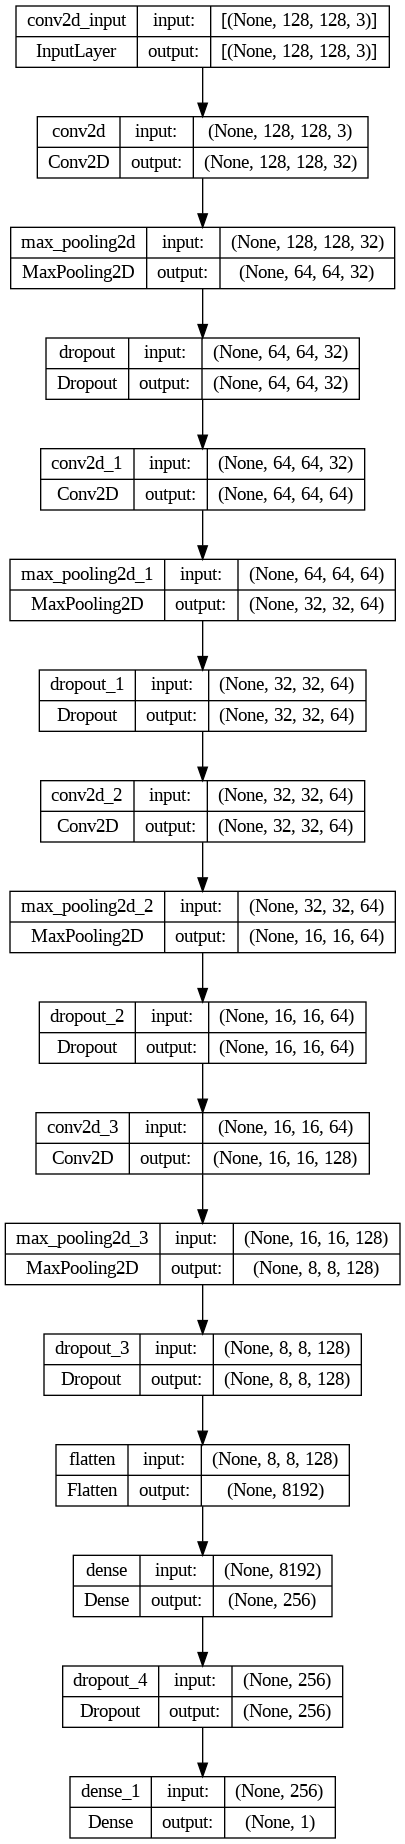

In [23]:
tf.keras.utils.plot_model(model, to_file = 'model.png', show_shapes = True, show_layer_names = True)

In [22]:
hist = model.fit(
    x=train, 
    epochs = EPOCHS,
    validation_data = val, 
    callbacks = callbacks_list
    )

Epoch 1/100
2440/2440 [==============================] - ETA: 0s - loss: 0.2507 - accuracy: 0.8805 - precision: 0.8718 - recall: 0.8927
Epoch 1: val_loss improved from inf to 0.03160, saving model to amazon_fire_model.h5
2440/2440 [==============================] - 317s 125ms/step - loss: 0.2507 - accuracy: 0.8805 - precision: 0.8718 - recall: 0.8927 - val_loss: 0.0316 - val_accuracy: 0.9956 - val_precision: 0.9940 - val_recall: 0.9969
Epoch 2/100
2440/2440 [==============================] - ETA: 0s - loss: 0.0276 - accuracy: 0.9927 - precision: 0.9936 - recall: 0.9918
Epoch 2: val_loss improved from 0.03160 to 0.01308, saving model to amazon_fire_model.h5
2440/2440 [==============================] - 255s 104ms/step - loss: 0.0276 - accuracy: 0.9927 - precision: 0.9936 - recall: 0.9918 - val_loss: 0.0131 - val_accuracy: 0.9975 - val_precision: 0.9961 - val_recall: 0.9987
Epoch 3/100
2440/2440 [==============================] - ETA: 0s - loss: 0.0181 - accuracy: 0.9952 - precision: 0.99

## Apresentando performance do teste

In [25]:
# Capturando métricas geradas pelo treinamento do modelo

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

prec = hist.history['precision']
val_prec = hist.history['val_precision']

rec = hist.history['recall']
val_rec = hist.history['val_recall']

epochs_range = range(len(acc))

In [67]:
def plot_model_metrics(history):
    plt.gcf().clear()
    plt.figure(figsize = (11, 5))
    epochs = range(len(history['accuracy']))

    plt.subplot(1, 2, 1)
    plt.title('Acurácia de Treino e Validação')
    plt.plot(epochs, history['accuracy'], label = 'Acurácia Treino')
    plt.plot(epochs, history['val_accuracy'], 'r--',label = 'Acurácia Validação')
    plt.legend(loc = 'lower right')
    plt.ylabel('Acurácia')
    plt.xlabel('Época')

    plt.subplot(1, 2, 2)
    plt.title('Perda de Treino e Validação')
    plt.plot(epochs, history['loss'], label = 'Perda Treino')
    plt.plot(epochs, history['val_loss'], 'r--',label = 'Perda Validação')
    plt.legend(loc = 'upper right')
    plt.ylabel('Perda')
    plt.xlabel('Época')

    plt.show()

<Figure size 640x480 with 0 Axes>

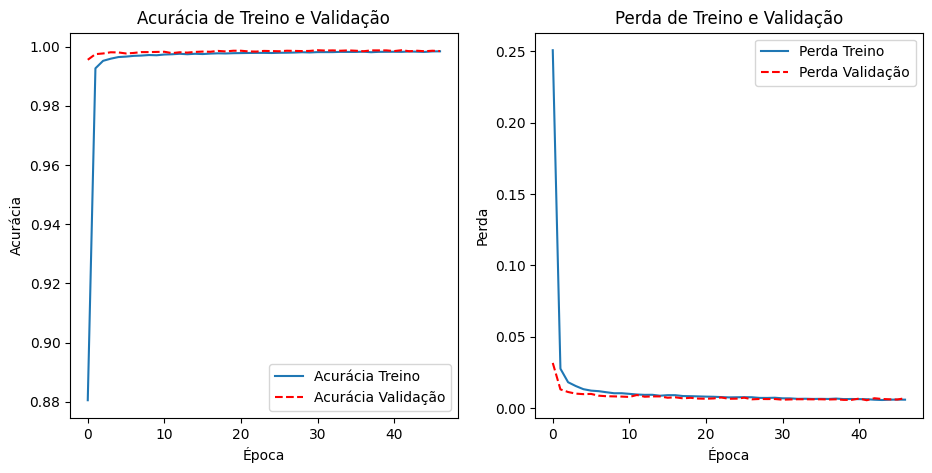

In [68]:
plot_model_metrics(hist.history)

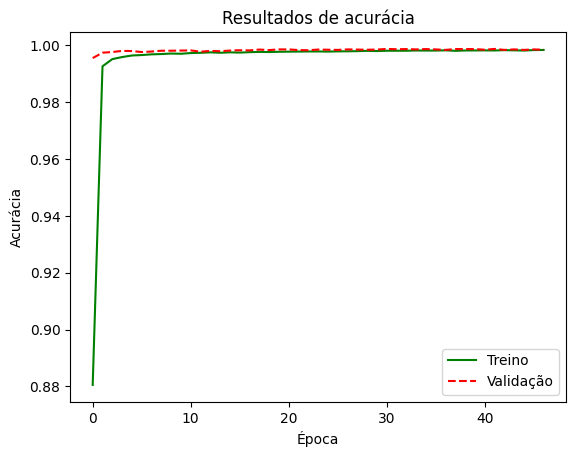

<Figure size 640x480 with 0 Axes>

In [62]:
# Acurácia
plt.plot(epochs_range, acc, color='green', label='Treino')
plt.plot(epochs_range, val_acc, 'r--', label='Validação')
plt.title('Resultados de acurácia')
plt.legend(loc='lower right') # 'upper left', 'upper right', 'lower left', 'lower right')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.figure()
plt.show()

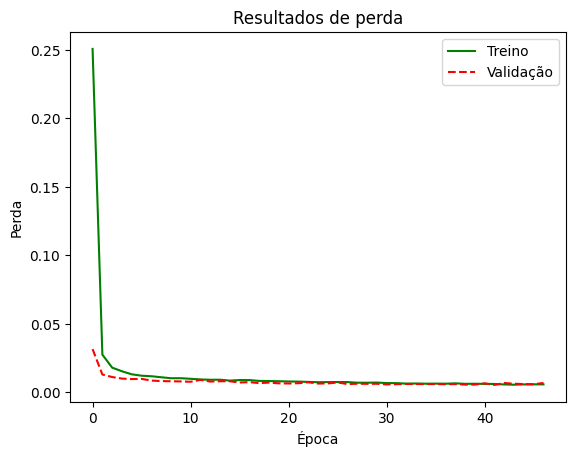

<Figure size 640x480 with 0 Axes>

In [33]:
# Perda/Loss
plt.plot(epochs_range, loss, color='green', label='Treino')
plt.plot(epochs_range, val_loss, 'r--', label='Validação')
plt.title('Resultados de perda')
plt.legend(loc='upper right') # 'upper left', 'upper right', 'lower left', 'lower right')
plt.ylabel('Perda')
plt.xlabel('Época')
plt.figure()
plt.show()

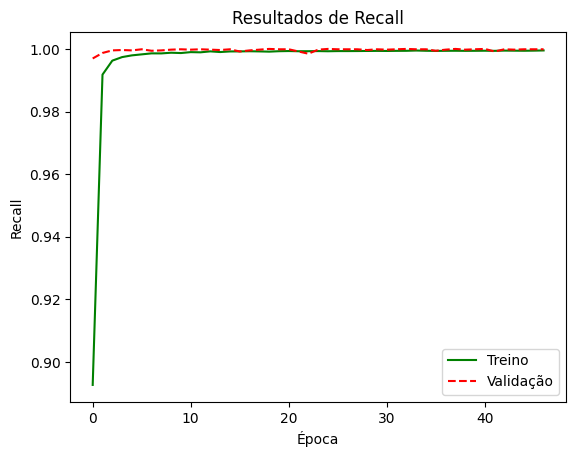

<Figure size 640x480 with 0 Axes>

In [34]:
# Recall
plt.plot(epochs_range, rec, color='green', label='Treino')
plt.plot(epochs_range, val_rec, 'r--', label='Validação')
plt.title('Resultados de Recall')
plt.legend(loc='lower right') # 'upper left', 'upper right', 'lower left', 'lower right')
plt.ylabel('Recall')
plt.xlabel('Época')
plt.figure()
plt.show()

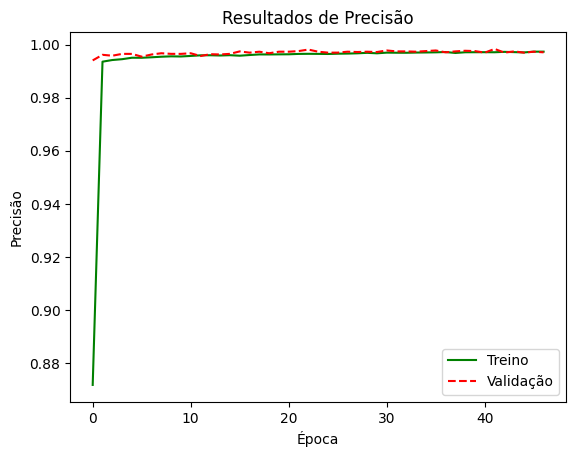

<Figure size 640x480 with 0 Axes>

In [35]:
# Precisão
plt.plot(epochs_range, prec, color='green', label='Treino')
plt.plot(epochs_range, val_prec, 'r--', label='Validação')
plt.title('Resultados de Precisão')
plt.legend(loc='lower right') # 'upper left', 'upper right', 'lower left', 'lower right')
plt.ylabel('Precisão')
plt.xlabel('Época')
plt.figure()
plt.show()

# Realizar teste do modelo

In [ ]:
#Restart da GPU

!pip install numba
from numba import cuda

device = cuda.get_current_device()
device.reset()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
def load_model(PATH):
  model_imported = load_model(PATH)
  return model_imported

In [37]:
import numpy as np
import tensorflow_datasets as tfds 
from keras.models import load_model

# Leitura do modelo salvo
MODEL_PATH = '/content/amazon_fire_model.h5'
new_model = load_model(MODEL_PATH)

history = new_model.get_metrics_result()

y_test_batches = tfds.as_numpy(test)
print('Total batches: ', len(y_test_batches))

Total batches:  1214


In [39]:
def predict_all_dataset_by_batch(dataset, imported_model):
  y_true = np.array([])
  y_pred = np.array([])
  idx = 0

  for features, labels in dataset:

    predictions = imported_model.predict_on_batch(features).flatten()
    predictions = tf.where(predictions < 0.5, 0, 1)

    y_true = np.concatenate((y_true, labels), axis=0)
    y_pred = np.concatenate((y_pred, predictions.numpy()), axis=0)
    idx += 1
    print('Predicting batch:   %s' % idx)
  
  return y_true, y_pred

In [ ]:
# Executa as predições por batch
y_true, y_pred = predict_all_dataset_by_batch(y_test_batches, new_model)

qtd_test_0, qtd_test_1, size_test = get_size_dataset(TEST_FOLDER)

In [42]:
print('Batches:     %s' % len(test))
print('Labels:      %s' % len(y_true))
print('Predições:   %s' % len(y_pred))

Batches:     1214
Labels:      38828
Predições:   38828


In [43]:
print(len(y_true))
qtd_test_0, qtd_test_1, size_test = get_size_dataset(TEST_FOLDER)
print(y_true)

38828
No Fire:  21691
Fire:     17137
Total:    38828
[1. 1. 0. ... 0. 0. 0.]


## Métricas do Teste

In [70]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

def plot_statistics_from_prediction(y_true, y_pred, class_names = ['0', '1']):
  print(classification_report(y_true, y_pred, target_names = class_names))
  print('\n')
  ConfusionMatrixDisplay.from_predictions(
    y_true, 
    y_pred,
    labels=[0,1],
    values_format = 'd',
    cmap = "Blues")

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     39893
           1       0.99      1.00      1.00     41947

    accuracy                           1.00     81840
   macro avg       1.00      0.99      1.00     81840
weighted avg       1.00      1.00      1.00     81840





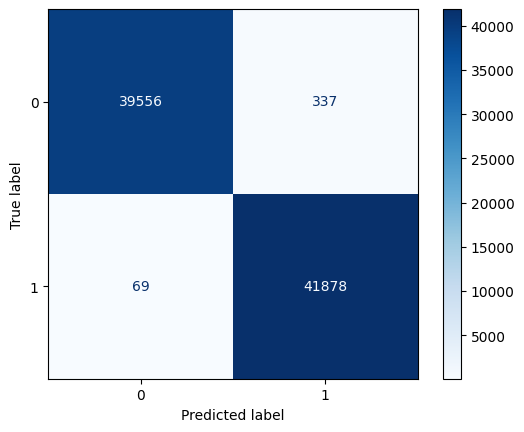

In [71]:
plot_statistics_from_prediction(y_true, y_pred)

In [ ]:
from numpy import asarray
from numpy import savetxt
# define data
# save to csv file
savetxt('labels_test.csv', y_true, delimiter=',')

In [ ]:
!mkdir csv_model
!mv /content/labels_test.csv /content/csv_model/labels_test.csv
!mv /content/pred_test.csv /content/csv_model/pred_test.csv

In [ ]:
!tar -zcvf csv_model.tar.gz '/csv_model/'

tar: Removing leading `/' from member names
tar: /csv_model: Cannot stat: No such file or directory
tar: Exiting with failure status due to previous errors


# (Estudo de Caso) Avaliação com Dataset da Venezuela

## Carregamento e Avaliação do Modelo Pré-Treinado

Este bloco de código é usado para carregar e avaliar o modelo pré-treinado em um novo conjunto de dados.

Primeiramente, ele carrega o conjunto de dados de avaliação localizado no diretório especificado na variável `EVALUATE_FOLDER`, usando o método `tf.keras.utils.image_dataset_from_directory().`

Em seguida, ele redimensiona uma imagem para uma forma (128,128) usando `tf.image.resize()` e se é visualizado usando a biblioteca Matplotlib.

Depois disso, ele prevê a classe da imagem redimensionada usando o modelo pré-treinado `model.predict()`, após o pré-processamento normalizando os valores de pixel dividindo por 255 e expandindo suas dimensões para corresponder ao formato de entrada esperado pelo modelo.

Em seguida, ele prepara o conjunto de dados de avaliação para a previsão, normalizando os valores de pixel e usando a função `map()` para aplicar essa normalização a cada elemento do conjunto de dados. Também extrai 20 imagens e rótulos desse conjunto de dados para inspeção visual, usando a técnica de slicing em arrays.

## Pré-processando imagens para subset de Teste

- Deve-se realizar o mesmo pré-processamento utilizado no treino.

In [ ]:
# Importando Dataset Venezuela

!gdown 1u_SDFRME8TGdO5TketUcthoseiBI1sOI
!unzip dataset_venezuela.zip
!rm -f dataset_venezuela.zip

In [47]:
!mv /content/content/dataset_venezuela /content/dataset_venezuela
!rm -r /content/content
!ls -1 /content/dataset_venezuela/0 | wc -l
!ls -1 /content/dataset_venezuela/1 | wc -l
# 39893 NO FIRE / 41947 FIRE

39893
41947


In [ ]:
# Plotando Imagens
eval_iterator = eval_data.as_numpy_iterator()
batch_eval = eval_iterator.next()

fig, ax = plt.subplots(ncols=4, figsize=(10,10))
for idx, img in enumerate(batch_eval[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch_eval[1][idx])
    ax[idx].axis("off")

In [ ]:
classes = ['fire']
plt.figure(figsize=(10, 10))
for images, labels in eval_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(classes[labels[i]])
    plt.axis("off")

In [ ]:
import tensorflow as tf

In [48]:
# Carrega imagens de avaliação
EVALUATE_FOLDER = '/content/dataset_venezuela/'

eval_data = tf.keras.utils.image_dataset_from_directory(
    directory = EVALUATE_FOLDER, 
    image_size = (IMAGE_HEIGHT, IMAGE_WIDTH), 
    shuffle = True
    )

# Normalizando imagens da avaliação
eval = eval_data.map(lambda x,y: (x/255, y))

# Convertendo o tf.data.Dataset em Numpy Array
y_eval_batches = tfds.as_numpy(eval)
print('Total batches:', len(y_eval_batches))

Found 81840 files belonging to 2 classes.
Total batches: 2558


## Avaliando o Modelo

In [49]:
eval_model = load_model(MODEL_PATH)

In [ ]:
# Executa as predições por batch
y_true, y_pred = predict_all_dataset_by_batch(y_eval_batches, eval_model)

In [54]:
qtd_eval_0, qtd_eval_1, size_test = get_size_dataset(EVALUATE_FOLDER)

No Fire:  39893
Fire:     41947
Total:    81840


## Métricas da avaliação

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     39893
           1       0.99      1.00      1.00     41947

    accuracy                           1.00     81840
   macro avg       1.00      0.99      1.00     81840
weighted avg       1.00      1.00      1.00     81840





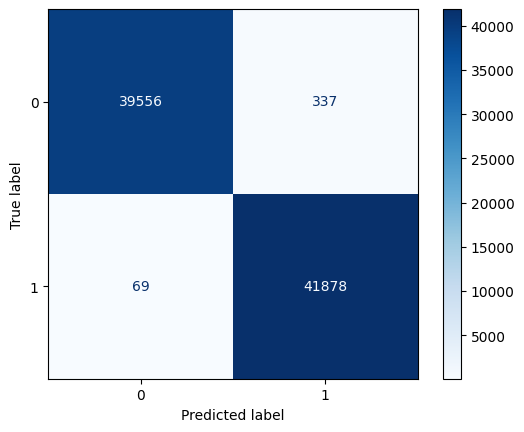

In [72]:
plot_statistics_from_prediction(y_true, y_pred)

# Executando predição em pequena quantidade

In [52]:
# Função para realizar teste em amostra

def plot_small_dataset_predictions(dataset, imported_model, number, class_names=['0','1']):

    features, labels = dataset.as_numpy_iterator().next()

    predictions = imported_model.predict_on_batch(features).flatten()
    preds = tf.where(predictions < 0.5, 0, 1).numpy()

    print('Labels:      %s' % labels)
    print('Predições:   %s' % preds)

    plt.gcf().clear()
    plt.figure(figsize = (20, 20))

    for i in range(number):

        plt.subplot(4, 8, i + 1)
        plt.axis('off')
        
        resized_image = features[i] * 255
        title = [labels[i].astype(int), preds[i].astype(int)]
        
        plt.imshow(resized_image.astype('uint8'))
        plt.title(title)
    return labels, predictions

Labels:      [1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0]
Predições:   [1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0]


<Figure size 640x480 with 0 Axes>

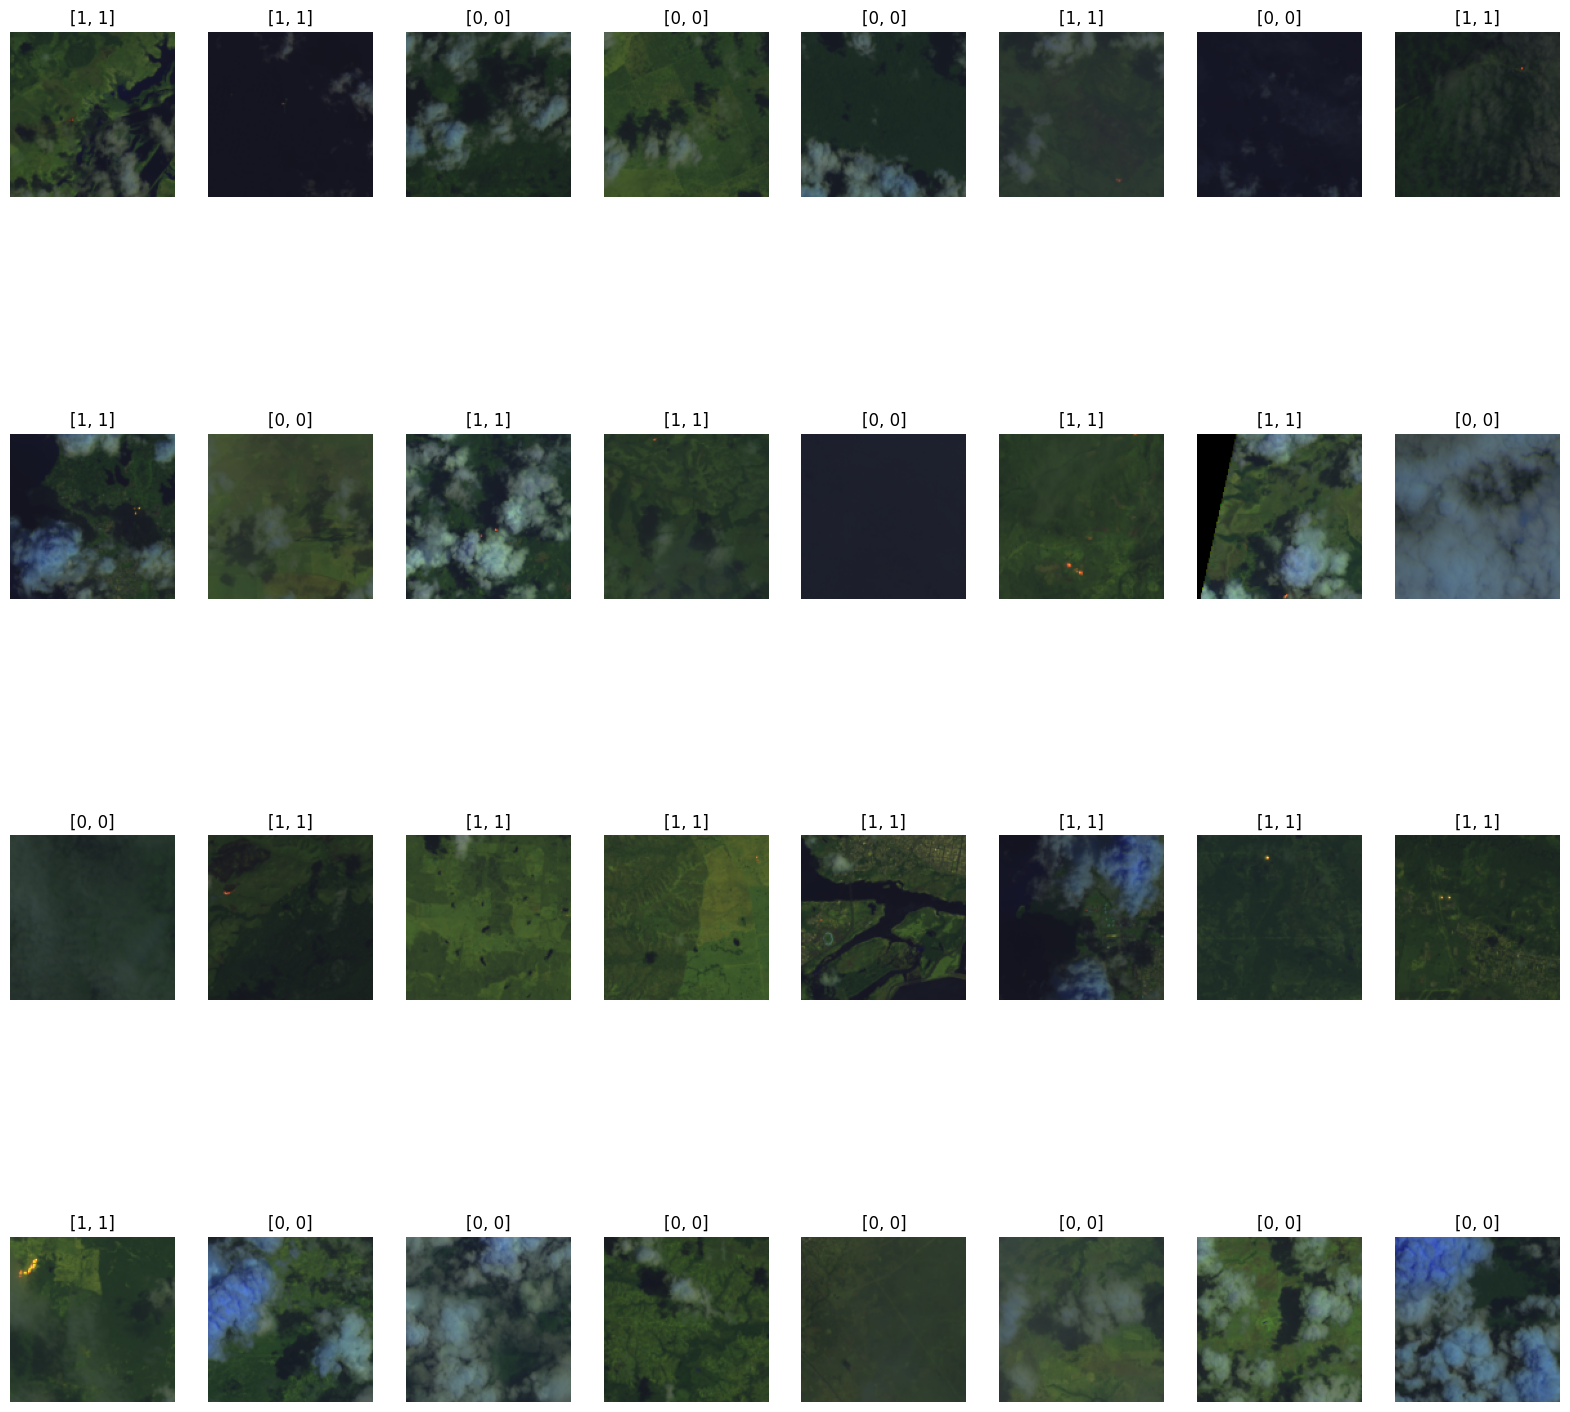

In [53]:
pred = plot_small_dataset_predictions(eval, new_model, 32)